In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [4]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [5]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
digits.data.shape

(1797, 64)

In [8]:
digits.target.shape

(1797,)

In [9]:
digits.target_names[::100]

array([0])

In [10]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [13]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

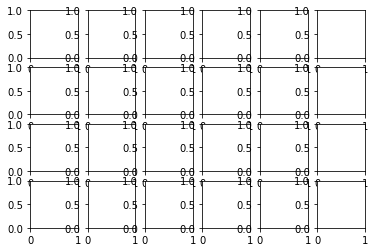

In [22]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4))

In [21]:
for item in zip(axes.ravel(),digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

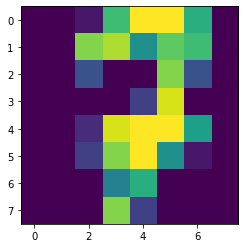

In [29]:
#axes = plt.subplot()
image = plt.imshow(digits.images[300],cmap=plt.cm.gray_r)

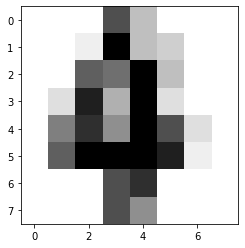

In [45]:
total = len(digits.data)

for image in range(0,500,100):
    #print(image)
    im = plt.imshow(digits.images[image], cmap=plt.cm.gray_r)
    

## Splitting data Training-Testing

In [47]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size = 0.25)

In [55]:
X_train.shape

(1347, 64)

In [56]:
X_test.shape

(450, 64)

## Creating the model - KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()

## Training the Model

In [61]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

## Predicting Digit Classes

In [63]:
predicted = knn.predict(X=X_test)
expected = y_test

In [64]:
predicted[::20]

array([0, 9, 3, 2, 0, 2, 1, 4, 3, 5, 9, 7, 5, 8, 0, 3, 1, 9, 7, 1, 8, 3,
       0])

In [65]:
expected[::20]

array([0, 9, 3, 2, 0, 2, 1, 4, 3, 5, 9, 7, 5, 8, 0, 3, 1, 9, 7, 1, 8, 8,
       0])

### List all incorrect numbers

In [67]:
wrong = [(p,e) for (p,e) in zip(predicted, expected) if p != e]
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

## Metrics for Model - Accurace

#### 1.Estimator Method

In [68]:
#Estimator Method

print(f'{knn.score(X_test,y_test):.2%}')

97.78%


#### 2.Confusion Matrix

In [75]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [71]:
confusion = confusion_matrix(y_true=expected, y_pred = predicted)

In [72]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

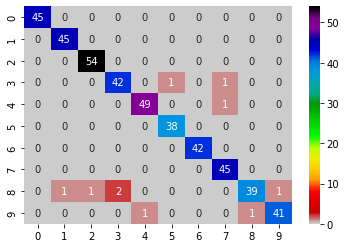

In [76]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

## Classification Report

In [78]:
from sklearn.metrics import classification_report

In [80]:
names = [str(digits) for digits in digits.target_names]

print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



## K-fold Cross-Validation

In [81]:
# This enables to use all of my data for both training and testing

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [83]:
kfold = KFold(n_splits=10,random_state=11,shuffle=True)

In [85]:
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

In [86]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [87]:
kfold

KFold(n_splits=10, random_state=11, shuffle=True)

In [91]:
print(f'{knn.score(X_test,y_test):.2%}')

97.78%


In [93]:
scores.mean()*100

98.77653631284916

## Running Multiple models to find the best one